In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Optics

In [5]:
IR1 = Optics.Beam(w0=1, lam=800e-9)
IR2 = Optics.Beam(w0=1, lam=800e-9)

grid1 = IR1.Grid(Lx=10, Ly=10, Nx=1001, Ny=1001)

In [6]:
def OAM_per_photon(field, grid):

    field = np.flip(field, axis=1)

    x, y = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
    Nx, Ny = len(x), len(y)
    dx = x[1]- x[0]
    dy = y[1]- y[0]

    X = np.outer(x, np.ones(Nx))
    Y = np.outer(y, np.ones(Ny)).T

    dX, dY = np.gradient(field, dx, dy)

    L = (dY*X) - (dX*Y)
    L = -1j * L

    ELE = np.sum( np.real(np.conj(field) * L) )
    EE = np.sum( np.abs(field)**2 )

    return ELE/EE

In [7]:
driver = IR1.LGBeam(*grid1, z=0, l=0, p=0) + IR2.LGBeam(*grid1, z=0, l=1, p=0)
OAM_per_photon(driver, grid1)

0.4999750006250004

In [4]:
alpha_range = np.linspace(0, 1, 30)

oam_IR = []

for alpha in alpha_range:
    driver = IR1.LGBeam(*grid1, z=0, l=0, p=0) + alpha*IR2.LGBeam(*grid1, z=0, l=1, p=0)
    oam_IR.append(OAM_per_photon(driver, grid1))

In [9]:
q_list = [11, 15, 19, 21, 25]
qeff=3.5

harm_list = []

for q in q_list:
    oam_harm = []

    for alpha in alpha_range:

        driver = IR1.LGBeam(*grid1, z=0, l=0, p=0) + alpha*IR2.LGBeam(*grid1, z=0, l=1, p=0)
        harm = np.abs(driver)**qeff * np.exp(1j*q*np.angle(driver))

        oam_harm.append(OAM_per_photon(harm, grid1))
    
    harm_list.append(oam_harm)

In [10]:
oam_IR = np.array(oam_IR)
harm_list = np.array(harm_list)

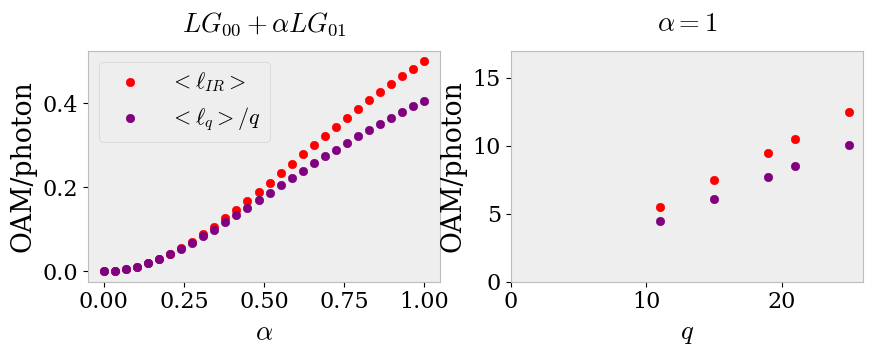

In [11]:
def oam_driver(alpha):
    return (alpha**2)/(1 + alpha**2)

def oam_Eq(alpha):
    return (2*alpha**2 + alpha**4)/(2 + 4*alpha**2 + alpha**4)

fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(1, 2)
ax = [plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1])]

q=q_list[0]
ax[0].scatter(alpha_range, oam_IR, color='r', label=r'$<\ell_{IR}>$')
ax[0].scatter(alpha_range, harm_list[0]/q, color='purple', label=r'$<\ell_{q}>/q$')

for i, q in enumerate(q_list):
    ax[1].scatter(q, oam_IR[-1]*q, color='r')
    ax[1].scatter(q, harm_list[i][-1], color='purple')


ax[0].legend()

ax[0].set_title(r'$LG_{00} + \alpha LG_{01}$')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'OAM/photon')

ax[1].set_title(r'$\alpha=1$')
ax[1].set_xlabel(r'$q$')
ax[1].set_ylabel(r'OAM/photon')
ax[1].set_ylim(0, 17)
ax[1].set_xlim(0, max(q_list)+1)

plt.show()

In [14]:
q=q_list[0]
np.save('simu', np.array([alpha_range, harm_list[0]/q]))